In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score

In [2]:
data =  pd.read_csv('Social_Network_Ads.csv')
data.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data.shape

(400, 3)

In [13]:
x = data.iloc[:, :2]  # First two columns: Age and EstimatedSalary
y = data.iloc[:, 2]   # Third column: Purchased


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [16]:
lr = LogisticRegression(random_state = 0,solver = 'lbfgs')
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
       
print(x_test[:10])
print('-'*15)
print(pred[:10])

[[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]
 [ 1.0088136   0.76240757]
 [-0.85693511 -1.22394166]
 [-0.75873781 -0.23076704]
 [ 0.9106163   1.08372877]
 [-0.85693511  0.38266434]
 [ 0.2232352   0.14897619]
 [ 0.4196298  -0.14313399]]
---------------
[0 1 0 1 0 0 1 0 0 0]


In [17]:
print('Expected Output:',pred[:10])
print('-'*15)
print('Predicted Output:\n',y_test[:10])

Expected Output: [0 1 0 1 0 0 1 0 0 0]
---------------
Predicted Output:
 209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
Name: Purchased, dtype: int64


In [18]:
matrix = confusion_matrix(y_test,pred,labels = lr.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

[[61  2]
 [12 25]]


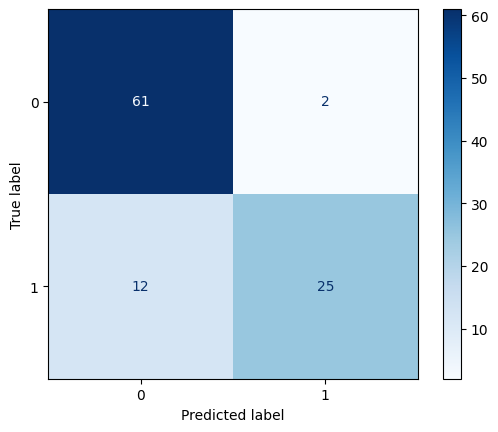

In [19]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [21]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,pred)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 0.86
Error Rate:  0.14
Sensitivity (Recall or True positive rate) : 0.6756756756756757
Specificity (True negative rate) : 0.9682539682539683
Precision (Positive predictive value) : 0.9259259259259259
False Positive Rate : 0.031746031746031744
